In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns

<h1>1. Introdução</h1>

<h2>1.1 Leitura dos dados</h2>

In [2]:
n_read_rows = None
df = pd.read_csv('/home/davi/PycharmProjects/M-learn/mlfwk/datasets/measurements.csv', delimiter=',', nrows = n_read_rows)
df.dataframeName = 'pmsm_temperature_data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 388 rows and 12 columns


In [5]:
#Creating a function to convert the values
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)
    
#Converting the data
df['distance'] = df['distance'].apply(comma_converter)
df['consume'] = df['consume'].apply(comma_converter)
df['temp_inside'] = df['temp_inside'].apply(comma_converter)
df['temp_outside'] = df['temp_outside'].apply(comma_converter)
df['refill liters'] = df['refill liters'].apply(comma_converter)

df['km_absolute'] = df['distance'].cumsum()
df['consume_liter'] = df['consume']/100*df['distance']

In [6]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,km_absolute,consume_liter
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10,28.0,1.4000
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN,40.0,0.5040
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,51.2,0.6160
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN,64.1,0.5031
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,82.6,0.8325


In [11]:
df.shape

(388, 14)

In [12]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
km_absolute        0
consume_liter      0
dtype: int64

Visto que as colunas, refill liters, refill liters e specials existem muitas colunas NaN, ela ira ser excluida.

In [6]:
new_df = df.drop(columns=['refill liters', 'refill gas', 'specials', 'temp_inside'])

In [7]:
new_df['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [13]:
new_df['gas_type'][new_df['gas_type'] == 'E10'] = 0
new_df['gas_type'][new_df['gas_type'] == 'SP98'] = 1

NameError: name 'new_df' is not defined

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
distance        388 non-null object
consume         388 non-null object
speed           388 non-null int64
temp_outside    388 non-null int64
gas_type        388 non-null object
AC              388 non-null int64
rain            388 non-null int64
sun             388 non-null int64
dtypes: int64(5), object(3)
memory usage: 24.4+ KB


In [16]:
df['distance'].unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [15]:
',' in '4,2'

True

Text(9.087785947712426, 0.5, 'distance [Km]')

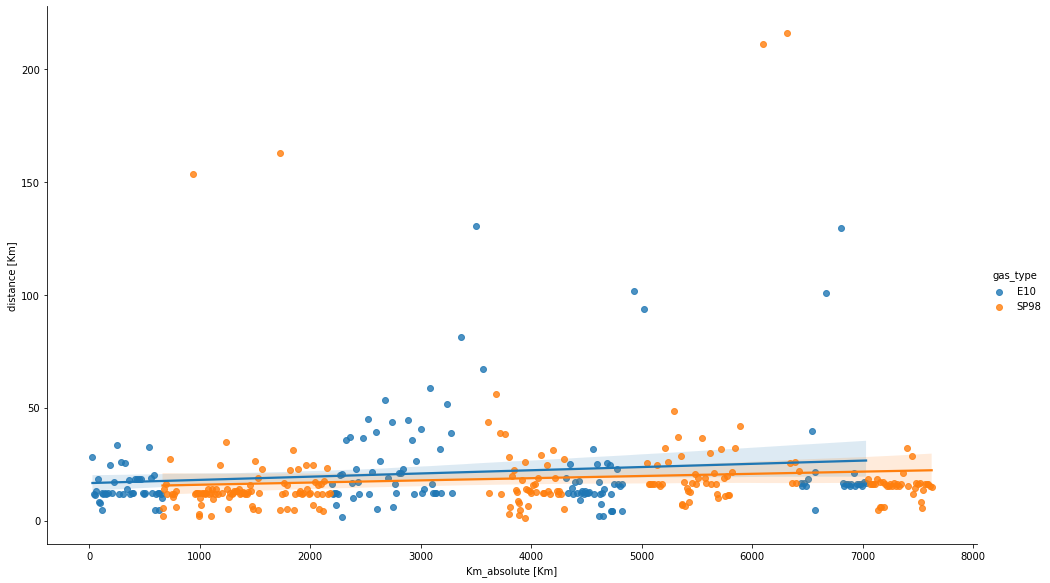

In [9]:
#Distance vs Km_Absolute
#How the the distances distributing during the full distance 
sns.lmplot(data=df,x='km_absolute',y='distance', hue='gas_type', height=8, aspect=1.7,)
plt.xlabel('Km_absolute [Km]')
plt.ylabel('distance [Km]')

Text(8.823571537990205, 0.5, 'temp_outside [°C]')

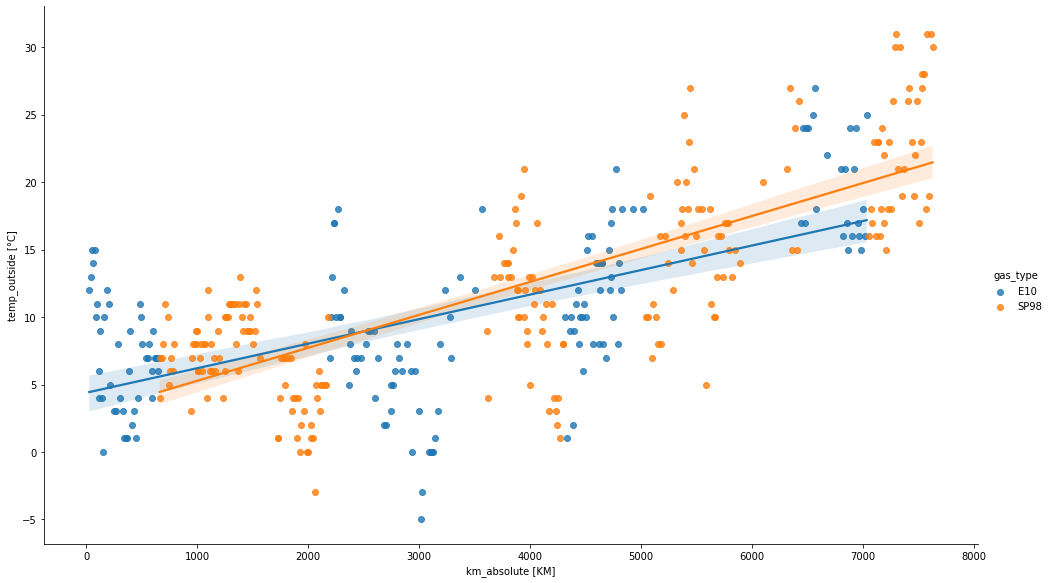

In [10]:
sns.lmplot(data = df, x = 'km_absolute', y =  'temp_outside',hue='gas_type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp_outside [°C]')